<a href="https://colab.research.google.com/github/Sree-git4/Personal-Project-Sree/blob/main/Copy_of_5_countries_hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import requests
import pandas as pd
import os
from google.colab import files

def download_and_process_data(url):
  filename = os.path.basename(url)
  response = requests.get(url)

  with open(filename, 'wb') as file:
      file.write(response.content)

  df = pd.read_csv(filename)

  return df


protest_df = download_and_process_data("https://raw.githubusercontent.com/IkerZha0401/QM2_Final_PJ/refs/heads/main/ProtestV1.csv")
protest_df

,event_id_cnty,event_date,year,country,latitude,longitude
0,IRN6075,31 January 2020,2020,Iran,32.6525,51.6746
1,ALG8120,31 January 2020,2020,Algeria,36.7500,5.0833
2,ALG8123,31 January 2020,2020,Algeria,36.3800,3.9014
3,ALG8124,31 January 2020,2020,Algeria,36.7664,3.4772
4,ALG8126,31 January 2020,2020,Algeria,36.3650,6.6147
...,...,...,...,...,...,...
52680,ALG1318,25 January 2005,2005,Algeria,35.3758,1.3131
52681,ALG1316,25 January 2005,2005,Algeria,34.8472,-1.7286
52682,ALG1317,25 January 2005,2005,Algeria,36.4703,1.4531
52683,ALG1314,25 January 2005,2005,Algeria,36.0750,4.7750


In [39]:
# List of countries to filter by
countries_of_interest = ['Algeria', 'Bahrain', 'Jordan', 'Libya', 'Syria', 'Tunisia']

# Filter the DataFrame for the selected countries
filtered_df = protest_df[protest_df['country'].isin(countries_of_interest)]

# Display the filtered DataFrame
filtered_df.head()


,event_id_cnty,event_date,year,country,latitude,longitude
1,ALG8120,31 January 2020,2020,Algeria,36.7500,5.0833
2,ALG8123,31 January 2020,2020,Algeria,36.3800,3.9014
3,ALG8124,31 January 2020,2020,Algeria,36.7664,3.4772
4,ALG8126,31 January 2020,2020,Algeria,36.3650,6.6147
5,TUN6106,31 January 2020,2020,Tunisia,36.2941,8.7666


In [40]:
# Group the filtered DataFrame by 'country' and 'year', and count the number of protests
protests_by_year_country = filtered_df.groupby(['country', 'year']).size().reset_index(name='protest_count')

# Display the result
protests_by_year_country.head()




,country,year,protest_count
0,Algeria,2005,6
1,Algeria,2006,7
2,Algeria,2007,2
3,Algeria,2008,9
4,Algeria,2009,12


In [41]:
# Save the grouped data to a CSV file
protests_by_year_country.to_csv('protests_by_year_country.csv', index=False)

# Provide a link to download the file
files.download('protests_by_year_country.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
gdp_df = download_and_process_data('https://raw.githubusercontent.com/Sree-git4/Personal-Project-Sree/refs/heads/main/GDP_data.csv')
gdp_df.head()



,Series Name,GDP (current US$),GDP (current US$).1,GDP (current US$).2,GDP (current US$).3,GDP (current US$).4,GDP (current US$).5
0,Country Name,Algeria,Syrian Arab Republic,Tunisia,Bahrain,Jordan,Libya
1,2005 [YR2005],107046618669.71,28858965517,32272186695,15968723404,12588998590,47334691241
2,2006 [YR2006],123084258693.01,33751788856,34376664601,18504760638,15056981664,60094231607
3,2007 [YR2007],142482739809.85,40465318382,38915353867,21730000000,17110437236,68032978391
4,2008 [YR2008],180383848331.14,52557913569,44859439902,25710904255,22658715989,86710767415


In [43]:
import pandas as pd

# Assuming gdp_df is already loaded
# Rename the 'GDP (current US$)' columns to avoid conflict during melting
gdp_df.columns = ['Series Name', 'Algeria', 'Syrian Arab Republic', 'Tunisia', 'Bahrain', 'Jordan', 'Libya']

# Melting the DataFrame to long format
gdp_df_long = gdp_df.melt(id_vars=['Series Name'], var_name='country', value_name='GDP (current US$)')

# Extract the year from the 'Series Name' and clean the 'country' column
gdp_df_long['year'] = gdp_df_long['Series Name'].str.extract(r'(\d{4})')
gdp_df_long['country'] = gdp_df_long['country'].str.split(' ').str[0]  # Keep only the country name

# Now, you have a DataFrame in long format with 'country' and 'year' as columns
gdp_df_long = gdp_df_long[['country', 'year', 'GDP (current US$)']]

# Renaming the GDP column
gdp_df_long.rename(columns={'GDP (current US$)': 'GDP in USD'}, inplace=True)

# Displaying the reshaped DataFrame
print(gdp_df_long)
gdp_df_long.to_csv('gdp_df_long.csv', index=False)  # Save to a CSV file

files.download('gdp_df_long.csv')


     country  year       GDP in USD
0    Algeria   NaN          Algeria
1    Algeria  2005  107046618669.71
2    Algeria  2006  123084258693.01
3    Algeria  2007  142482739809.85
4    Algeria  2008  180383848331.14
..       ...   ...              ...
115    Libya  2019      69254496472
116    Libya  2020      46854285441
117    Libya  2021      35217995647
118    Libya  2022      43246297922
119    Libya  2023      45096462972

[120 rows x 3 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
# Convert 'year' columns to integer type in both DataFrames
protests_by_year_country['year'] = protests_by_year_country['year'].astype(int)
gdp_df_long['year'] = pd.to_numeric(gdp_df_long['year'], errors='coerce').astype('Int64') # Changed line
#errors='coerce' handles NaNs and other invalid parsing
#Int64 can handle NaN

# Merging the two DataFrames on 'country' and 'year'
merged_df = pd.merge(protests_by_year_country, gdp_df_long, on=['country', 'year'], how='inner')

# Display the merged DataFrame with 'country', 'year', 'protest_count', and 'GDP (current US$)' side by side
merged_df = merged_df[['country', 'year', 'protest_count', 'GDP in USD']]

# Display the first few rows of the merged DataFrame
print(merged_df.head())


   country  year  protest_count       GDP in USD
0  Algeria  2005              6  107046618669.71
1  Algeria  2006              7  123084258693.01
2  Algeria  2007              2  142482739809.85
3  Algeria  2008              9  180383848331.14
4  Algeria  2009             12  150317292079.36


In [45]:
# Drop rows with missing values for a cleaner analysis
merged_df_clean = merged_df.dropna(subset=['GDP in USD', 'protest_count'])

# Compute Pearson correlation coefficient between GDP and number of protests
correlation = merged_df_clean['GDP in USD'].corr(merged_df_clean['protest_count'])

print("Pearson Correlation Coefficient between GDP and Protests: ", correlation)


Pearson Correlation Coefficient between GDP and Protests:  -0.08078651918348467


In [46]:
from scipy.stats import spearmanr

spearman_corr, _ = spearmanr(merged_df['GDP in USD'], merged_df['protest_count'])
print(f"Spearman Rank Correlation: {spearman_corr}")


Spearman Rank Correlation: -0.092731243594777


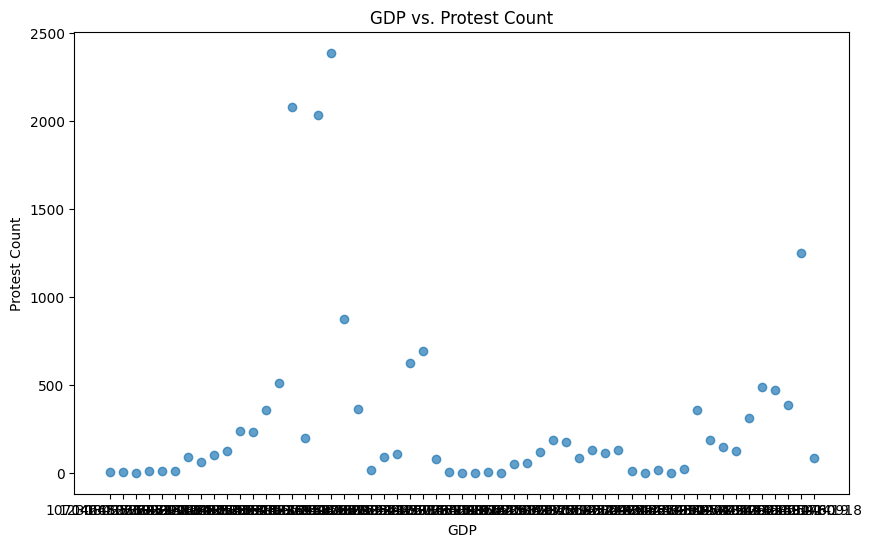

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['GDP in USD'], merged_df['protest_count'], alpha=0.7)
plt.title('GDP vs. Protest Count')
plt.xlabel('GDP')
plt.ylabel('Protest Count')
plt.show()


In [48]:
correlation_matrix = merged_df[['GDP in USD', 'protest_count']].corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                GDP in USD  protest_count
GDP in USD       1.000000      -0.080787
protest_count   -0.080787       1.000000


In [49]:
from scipy import stats
import numpy as np

# Convert 'GDP in USD' and 'protest_count' columns to numeric (coercing errors to NaN)
merged_df_clean['GDP in USD'] = pd.to_numeric(merged_df_clean['GDP in USD'], errors='coerce')
merged_df_clean['protest_count'] = pd.to_numeric(merged_df_clean['protest_count'], errors='coerce')

# Drop rows with NaN values in either 'GDP in USD' or 'protest_count'
merged_df_clean = merged_df_clean.dropna(subset=['GDP in USD', 'protest_count'])

r, p_value = stats.pearsonr(merged_df_clean['protest_count'], merged_df_clean['GDP in USD'])

# Calculate t-statistic and critical t-value
# Extract protest_count from the DataFrame
protest_count = merged_df_clean['protest_count']
n = len(protest_count)  # Number of data points
degrees_of_freedom = n - 2
t_stat = r * np.sqrt(degrees_of_freedom) / np.sqrt(1 - r**2)
alpha = 0.05  # Common significance level
t_critical = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)

# Print the results
print("Pearson Correlation Coefficient (r):", r)
print("p-value:", p_value)
print("t-statistic:", t_stat)
print("Critical t-value:", t_critical)

# Determine whether to reject the null hypothesis
if abs(t_stat) > t_critical:
    print("Reject the null hypothesis: Significant correlation.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")


Pearson Correlation Coefficient (r): -0.08078651918348465
p-value: 0.5576556411585828
t-statistic: -0.5900634023116885
Critical t-value: 2.0057459953178687
Fail to reject the null hypothesis: No significant correlation.


In [50]:
# Step 1: Import pandas (if not already imported)
import pandas as pd

# Step 2: Display summary statistics for merged_df
summary_statistics = merged_df.describe()

# Step 3: Output the summary statistics
print("Summary Statistics for merged_df:")
print(summary_statistics)


Summary Statistics for merged_df:
              year  protest_count
count    55.000000      55.000000
mean   2013.818182     295.109091
std       4.603102     515.893173
min    2005.000000       1.000000
25%    2010.000000      13.500000
50%    2015.000000     114.000000
75%    2018.000000     335.500000
max    2020.000000    2387.000000


In [51]:
# Convert columns to numeric before calculating quantiles
merged_df['GDP in USD'] = pd.to_numeric(merged_df['GDP in USD'], errors='coerce')
merged_df['protest_count'] = pd.to_numeric(merged_df['protest_count'], errors='coerce')

Q1 = merged_df[['GDP in USD', 'protest_count']].quantile(0.25)
Q3 = merged_df[['GDP in USD', 'protest_count']].quantile(0.75)
IQR = Q3 - Q1
# Step 1: Calculate IQR
Q1 = merged_df[['GDP in USD', 'protest_count']].quantile(0.25)
Q3 = merged_df[['GDP in USD', 'protest_count']].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define non-outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out rows with outliers
filtered_df = merged_df[
    (merged_df['GDP in USD'] >= lower_bound['GDP in USD']) &
    (merged_df['GDP in USD'] <= upper_bound['GDP in USD']) &
    (merged_df['protest_count'] >= lower_bound['protest_count']) &
    (merged_df['protest_count'] <= upper_bound['protest_count'])
]
# Step 4: Output the cleaned dataset
print("Dataset after removing outliers:")
print(filtered_df)


Dataset after removing outliers:
    country  year  protest_count    GDP in USD
0   Algeria  2005              6  1.070466e+11
1   Algeria  2006              7  1.230843e+11
2   Algeria  2007              2  1.424827e+11
3   Algeria  2008              9  1.803838e+11
4   Algeria  2009             12  1.503173e+11
5   Algeria  2010              8  1.777851e+11
6   Algeria  2011             90  2.183319e+11
7   Algeria  2012             60  2.271437e+11
8   Algeria  2013            103  2.297014e+11
9   Algeria  2014            126  2.389427e+11
10  Algeria  2015            240  1.874939e+11
11  Algeria  2016            233  1.807638e+11
12  Algeria  2017            360  1.898809e+11
13  Algeria  2018            510  1.945545e+11
15  Algeria  2020            201  1.648734e+11
19  Bahrain  2019            365  4.044681e+10
20  Bahrain  2020             14  3.583763e+10
21   Jordan  2016             88  3.989255e+10
22   Jordan  2017            107  4.160844e+10
23   Jordan  2018          

In [52]:
# Removing Outliers
outliers_df = merged_df[
    (merged_df['GDP in USD'] < lower_bound['GDP in USD']) |
    (merged_df['GDP in USD'] > upper_bound['GDP in USD']) |
    (merged_df['protest_count'] < lower_bound['protest_count']) |
    (merged_df['protest_count'] > upper_bound['protest_count'])
]

print("\nOutliers removed:")
print(outliers_df)



Outliers removed:
    country  year  protest_count    GDP in USD
14  Algeria  2019           2079  1.934597e+11
16  Bahrain  2016           2036  3.388468e+10
17  Bahrain  2017           2387  3.720481e+10
18  Bahrain  2018            877  3.956798e+10
53  Tunisia  2019           1251  4.190564e+10


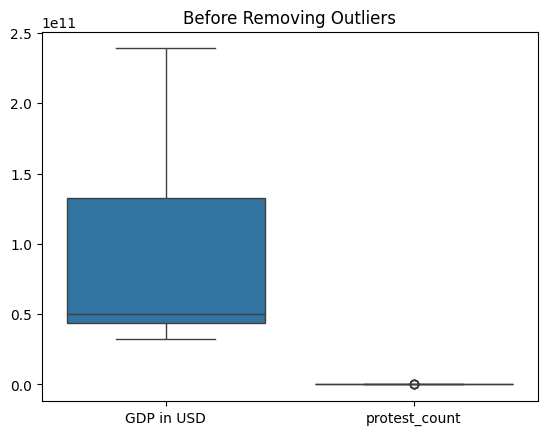

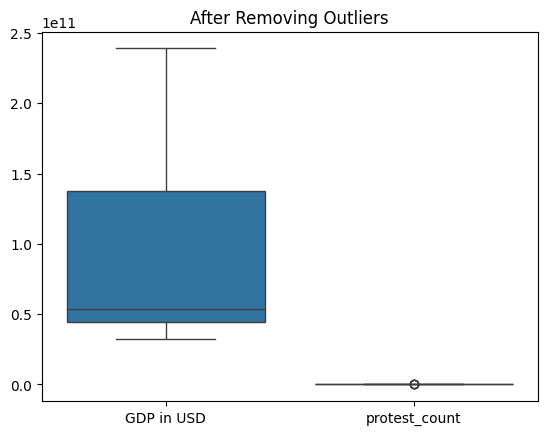

,country,year,protest_count,GDP in USD
0,Algeria,2005,6,1.070466e+11
1,Algeria,2006,7,1.230843e+11
2,Algeria,2007,2,1.424827e+11
3,Algeria,2008,9,1.803838e+11
4,Algeria,2009,12,1.503173e+11


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before removing outliers
sns.boxplot(data=merged_df[['GDP in USD', 'protest_count']])
plt.title("Before Removing Outliers")
plt.show()

# After removing outliers
sns.boxplot(data=filtered_df[['GDP in USD', 'protest_count']])
plt.title("After Removing Outliers")
plt.show()
filtered_df.head()


In [54]:
# Generate summary statistics for the cleaned dataset
summary_statistics = filtered_df.describe()

# Output the summary statistics
print("Summary Statistics After Removing Outliers:")
print(summary_statistics)


Summary Statistics After Removing Outliers:
              year  protest_count    GDP in USD
count    50.000000      50.000000  5.000000e+01
mean   2013.420000     152.020000  9.086314e+10
std       4.629497     175.362422  6.416615e+10
min    2005.000000       1.000000  3.227219e+10
25%    2010.000000      12.250000  4.459211e+10
50%    2014.000000      96.500000  5.382208e+10
75%    2017.000000     197.250000  1.376331e+11
max    2020.000000     693.000000  2.389427e+11


In [55]:
from scipy import stats
import numpy as np

# Assuming 'filtered_df' contains the relevant data
protest_count = filtered_df['protest_count']  # Independent variable
GDP_in_USD = filtered_df['GDP in USD']  # Dependent variable

# Perform the Pearson correlation test
r, p_value = stats.pearsonr(protest_count, GDP_in_USD)

# Calculate t-statistic and critical t-value
n = len(protest_count)  # Number of data points
degrees_of_freedom = n - 2
t_stat = r * np.sqrt(degrees_of_freedom) / np.sqrt(1 - r**2)
alpha = 0.05  # Common significance level
t_critical = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)

# Print the results
print("Pearson Correlation Coefficient (r):", r)
print("p-value:", p_value)
print("t-statistic:", t_stat)
print("Critical t-value:", t_critical)

# Determine whether to reject the null hypothesis
if abs(t_stat) > t_critical:
    print("Reject the null hypothesis: Significant correlation.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")

# Perform the Spearman rank correlation test
rho, p_value_spearman = stats.spearmanr(protest_count, GDP_in_USD)

# Print Spearman results
print("\nSpearman Rank Correlation Coefficient (rho):", rho)
print("p-value (Spearman):", p_value_spearman)

# Determine whether to reject the null hypothesis for Spearman
if p_value_spearman < alpha:
    print("Reject the null hypothesis (Spearman): Significant correlation.")
else:
    print("Fail to reject the null hypothesis (Spearman): No significant correlation.")


Pearson Correlation Coefficient (r): -0.0718763405831123
p-value: 0.6198732791725284
t-statistic: -0.4992652190483711
Critical t-value: 2.010634757624232
Fail to reject the null hypothesis: No significant correlation.

Spearman Rank Correlation Coefficient (rho): -0.08136602988116853
p-value (Spearman): 0.5743031652700985
Fail to reject the null hypothesis (Spearman): No significant correlation.


<ipython-input-56-8b1d7618b688>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['GDP in USD'] = pd.to_numeric(filtered_df['GDP in USD'], errors='coerce')
<ipython-input-56-8b1d7618b688>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['protest_count'] = pd.to_numeric(filtered_df['protest_count'], errors='coerce')


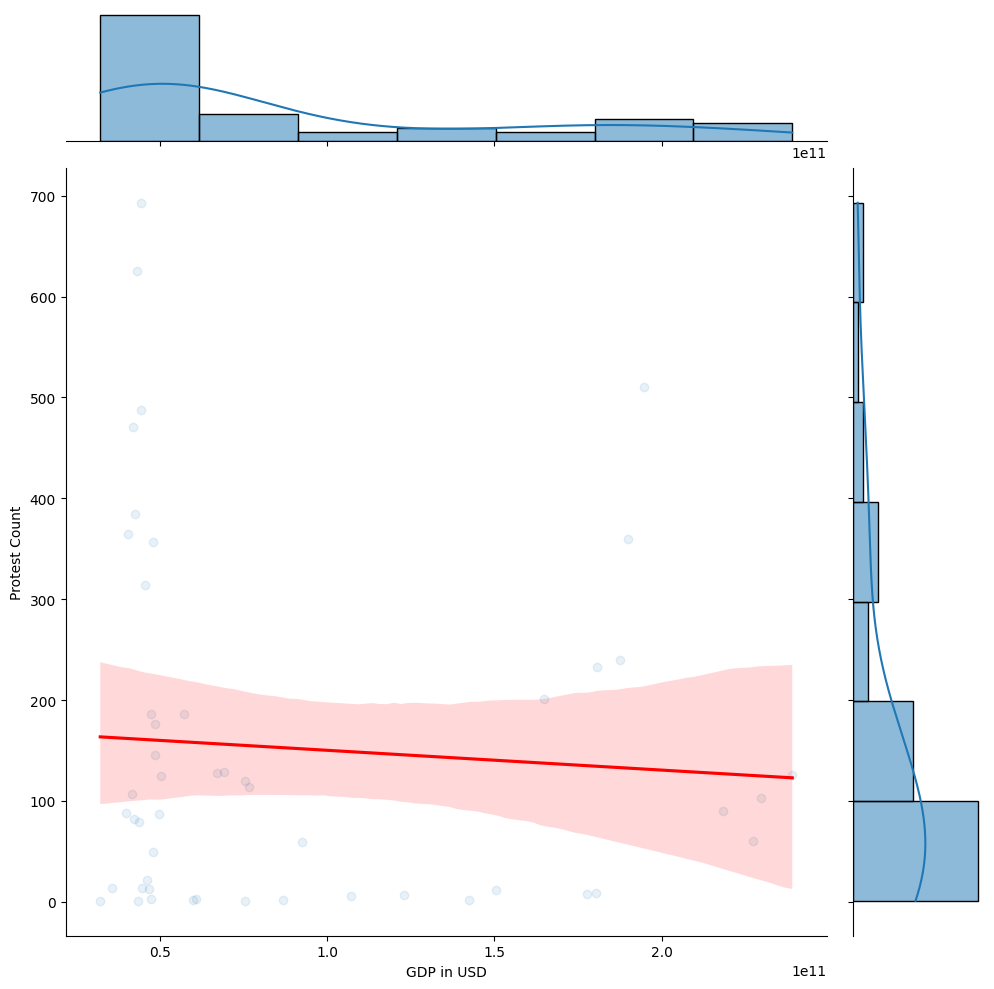

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'GDP in USD' and 'protest_count' columns to numeric (coercing errors to NaN)
filtered_df['GDP in USD'] = pd.to_numeric(filtered_df['GDP in USD'], errors='coerce')
filtered_df['protest_count'] = pd.to_numeric(filtered_df['protest_count'], errors='coerce')

# Drop rows with NaN values in either 'GDP in USD' or 'protest_count'
filtered_df_clean = filtered_df.dropna(subset=['GDP in USD', 'protest_count'])

# Create the jointplot for GDP in USD vs protest count
sns.jointplot(data=filtered_df_clean,
              x='GDP in USD',  # Set the x-axis to GDP in USD
              y='protest_count',  # Set the y-axis to protest count
              kind="reg",  # Set the kind of plot to be a regression plot
              scatter_kws=dict(alpha=0.1),  # Set the transparency of the points to 10%
              line_kws=dict(color='red'),  # Set the color of the regression line to red
              height=10)  # Set the height of the plot to be 10 inches

# Add labels to the axes
plt.xlabel('GDP in USD')  # Add a label to the x-axis
plt.ylabel('Protest Count')  # Add a label to the y-axis

# Show the plot
plt.show()



In [57]:
# Import the necessary module
import statsmodels.api as sm

# Define independent and dependent variables
X = filtered_df['protest_count']  # Independent variable (GDP per capita)
Y = filtered_df['GDP in USD']  # Dependent variable (Protest count)

# Add a constant to the independent variable for the intercept term in the regression model
X = sm.add_constant(X)  # Now 'sm' is defined and can be used

In [58]:
# Fit the regression model
model = sm.OLS(Y, X)
results = model.fit()

# Display the summary of the regression
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             GDP in USD   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.2493
Date:                Mon, 27 Jan 2025   Prob (F-statistic):              0.620
Time:                        11:07:13   Log-Likelihood:                -1314.5
No. Observations:                  50   AIC:                             2633.
Df Residuals:                      48   BIC:                             2637.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.486e+10   1.22e+10      7.804

Correlation Matrix:
               GDP in USD  protest_count
GDP in USD       1.000000      -0.071876
protest_count   -0.071876       1.000000


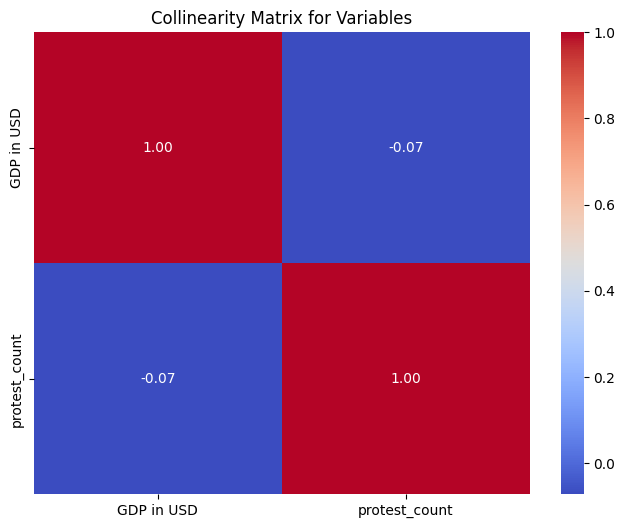

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = filtered_df[['GDP in USD', 'protest_count']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Collinearity Matrix for Variables")
plt.show()



<ipython-input-60-061b973fb232>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'GDP in USD': 'GDP_in_USD'}, inplace=True)


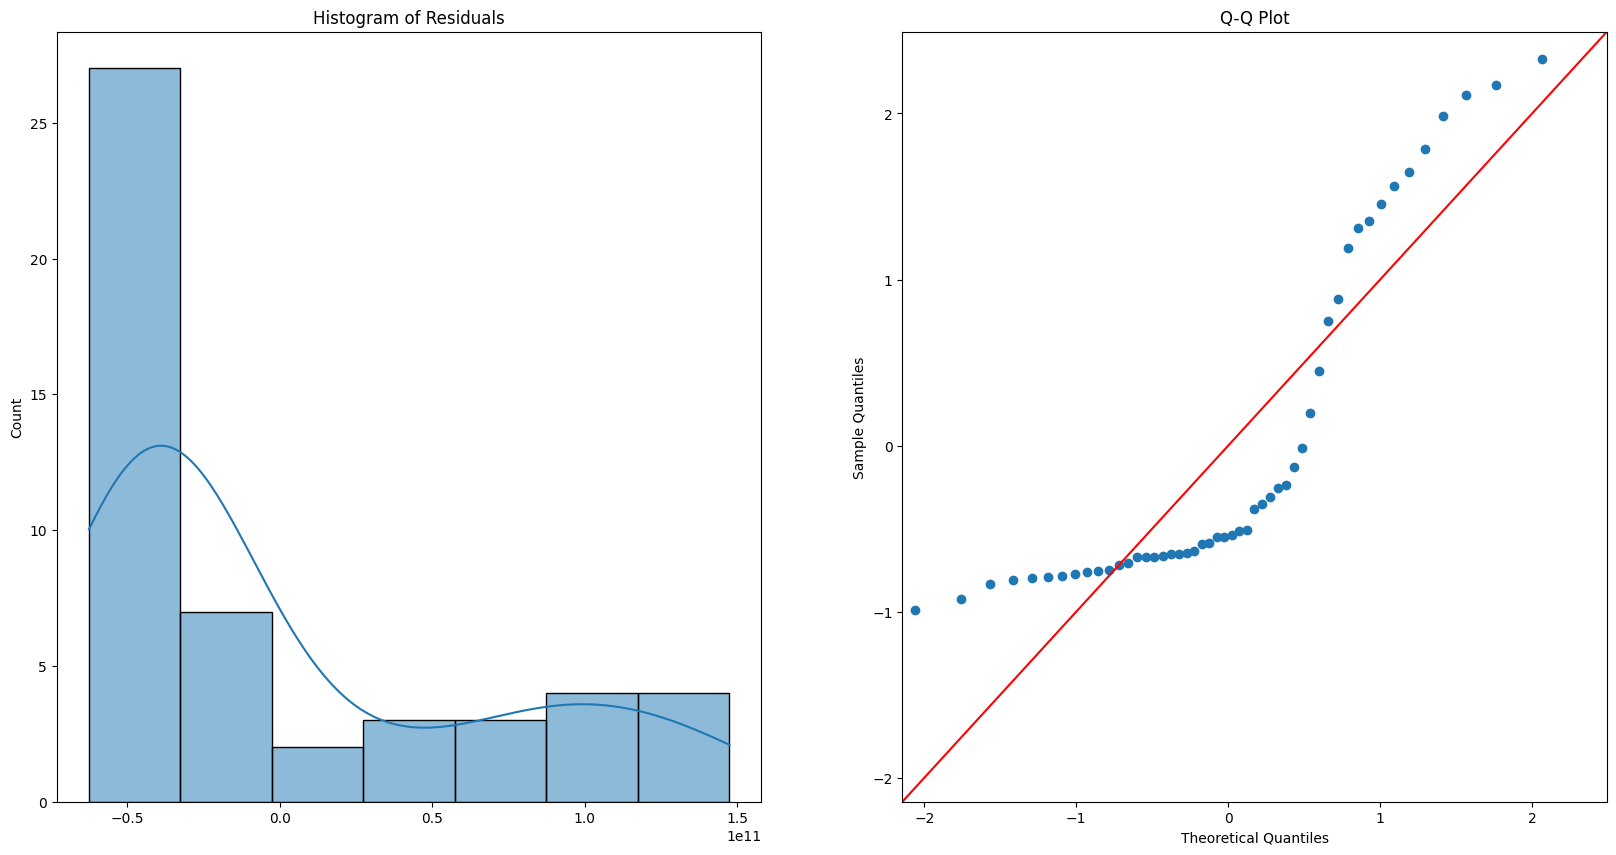

In [60]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt


# Rename the column to avoid spaces
filtered_df.rename(columns={'GDP in USD': 'GDP_in_USD'}, inplace=True)

# Fit the linear regression model using the new column name
model = smf.ols('GDP_in_USD ~ protest_count', data=filtered_df).fit()

# Get residuals
residuals = model.resid

# Make the figure wider
plt.rcParams["figure.figsize"] = [20, 10]

# Create a 1x2 subplot
f, axes = plt.subplots(1, 2)

# Plot the histogram of residuals with KDE
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Residuals')  # Add title

# Plot the Q-Q plot
sm.qqplot(residuals, line='45', fit=True, ax=axes[1])
axes[1].set_title('Q-Q Plot')  # Add title

# Show the plots
plt.show()


<ipython-input-61-a245cf1264f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['log_GDP_in_USD'] = np.log(filtered_df['GDP_in_USD'])


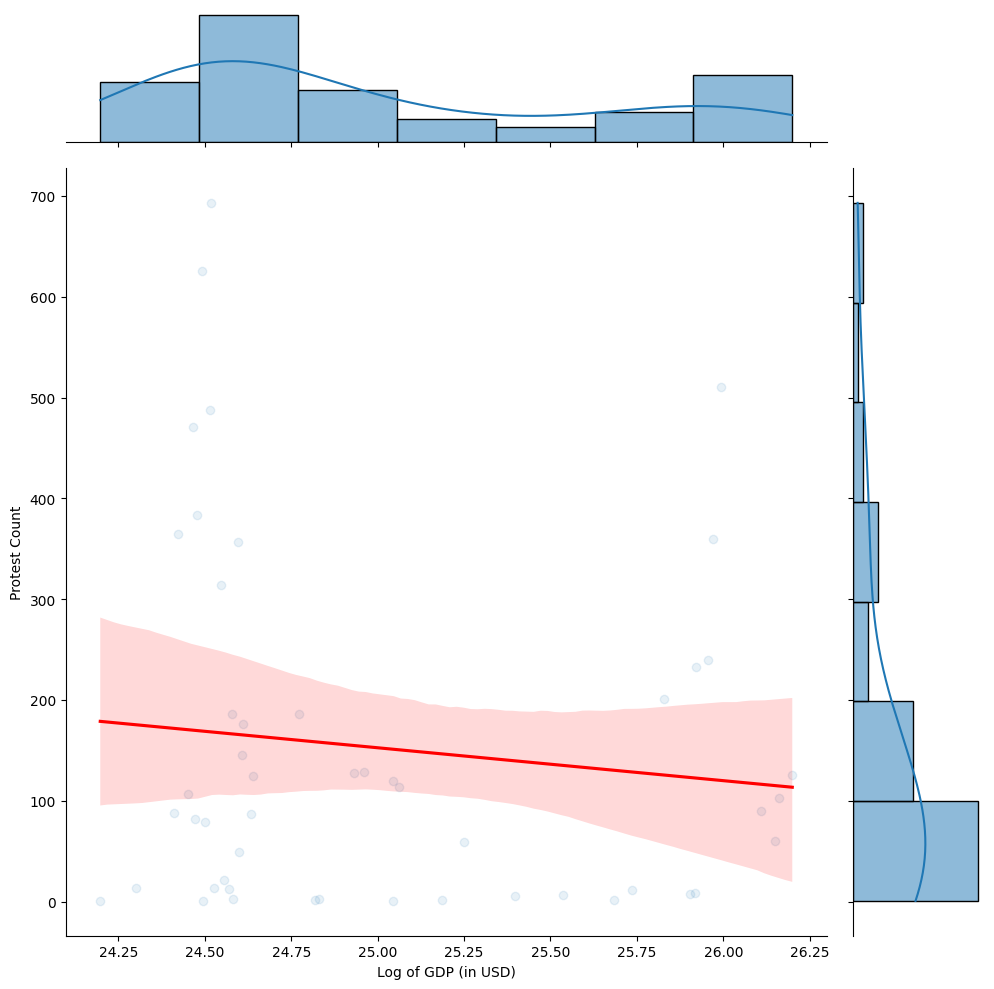

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Log-transform the 'GDP_in_USD' column to normalize it
filtered_df['log_GDP_in_USD'] = np.log(filtered_df['GDP_in_USD'])

# Step 2: Create a jointplot to visualize the relationship
sns.jointplot(
    data=filtered_df,
    x='log_GDP_in_USD',  # X-axis: Log-transformed GDP
    y='protest_count',  # Y-axis: protest count (no transformation)
    kind="reg",  # Regression plot
    scatter_kws=dict(alpha=0.1),  # Transparency for scatter points
    line_kws=dict(color='red'),  # Regression line color
    height=10  # Plot height
)

# Step 3: Add axis labels
plt.xlabel('Log of GDP (in USD)')
plt.ylabel('Protest Count')

plt.show()


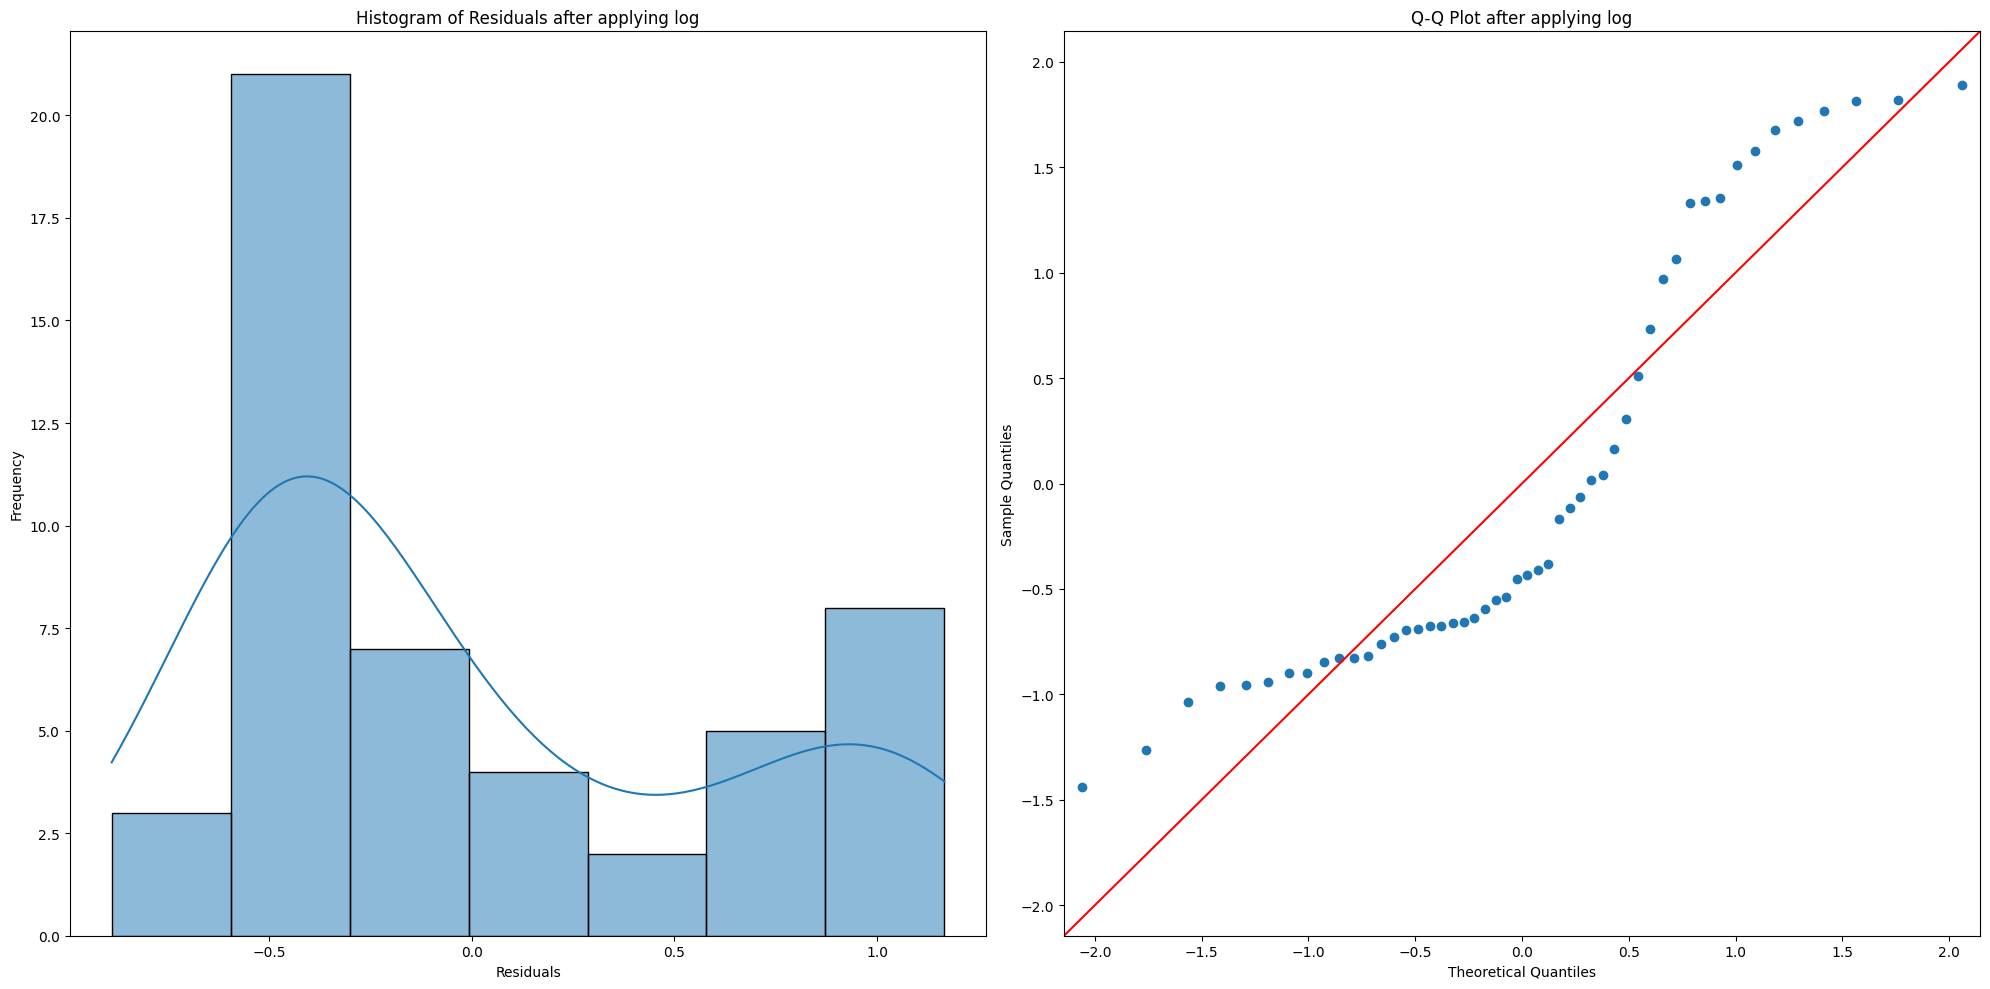

In [62]:
# Run the regression with log-transformed protest count
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the regression model with log-transformed GDP as the independent variable
model = ols('log_GDP_in_USD ~ protest_count', data=filtered_df).fit()

# Get residuals from the model
residuals = model.resid

# Make the figure wider
plt.rcParams["figure.figsize"] = [20, 10]

# Create a 1x2 subplot
f, axes = plt.subplots(1, 2)

# Histogram of residuals
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Residuals after applying log')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')

# Q-Q plot of residuals
sm.qqplot(residuals, line='45', fit=True, ax=axes[1])
axes[1].set_title('Q-Q Plot after applying log')

plt.tight_layout()
plt.show()


In [63]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

# Assuming filtered_df is already available in your environment
# Fit the regression model on original variables (unlogged model)
model = ols('GDP_in_USD ~ protest_count', data=filtered_df).fit()

# Fit the regression model on log-transformed variables (logged model)
log_model = ols('log_GDP_in_USD ~ protest_count', data=filtered_df).fit()

# Create the summary comparison table for both models
table = summary_col(
    [model, log_model],  # Models to compare
    stars=True,  # Add stars for significance levels
    float_format='%0.3f',  # Set decimal places to 3
    model_names=['Unlogged', 'Logged'],  # Model names
    info_dict={"N": lambda x: f"{int(x.nobs)}"}  # Add number of observations
)

# Print the comparison table
print(table)




                    Unlogged        Logged 
-------------------------------------------
Intercept      94861266084.637*** 25.086***
               (12155468801.585)  (0.118)  
protest_count  -26299977.180      -0.000   
               (52677367.012)     (0.001)  
R-squared      0.005              0.014    
R-squared Adj. -0.016             -0.007   
N              50                 50       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
